- 做评论百分比可行？时间序列？可以探索，不确定科学性
- 雨天，气温，周几 跟迪士尼情感分析？ 可以做
- 业务理论？ 旅游？ 不需要，关键在于方法，找一些论文参考即可
- 方法（时间序列；提取关键词）；
- 分项目    文章整体的逻辑和框架要搭好 ；每个分析要有主题，不能直接罗列，多写标题和过渡句，为什么做这部分转到下一部分；


- 词云展示效果不好，考虑去除停用词？而且分完词之后貌似还挺难展现的...
- 现在有一个问题就是，我想突出展示好的好在哪里，差的差在哪里，但是分完词之后割裂了，而且很多乱七八糟词，很多项目名词，去除掉？

#### 人群
#### BIO规范 （命名实体识别规范）
#### 依存句法 找实体和情感之间的关系）

理论不需要，关键在于方法，找一些论文参考即可

CNN RNN 

词频和情感的关系探索

1、标签根据需要设计，能够代表研究领域即可，标签类型不宜太多，因无足够数据支持  10类？
你提供的例句中，烟火—很火   头饰—必买，特别要注意情感词不一定是形容词    这样标注？
2、句子长度没有关系，最好是完整的评论  采用整句？
3、标注时，直接标注那个类型的实例，类型可以不标
4、标注时，发现是领域词，应整体标注（除非你用字向量），然后将这个词加入领域词典以备后用

#### 统计词频

In [ ]:
w=[]
for i in file['comment_seg_sentence']:
    w.extend(i.split(' '))
word_dict = pd.DataFrame(pd.Series(w).value_counts())

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline  
file=pd.read_excel('../语料/result_seg_sentence1.xlsx',sheetname='rawdata')
file['date']=pd.to_datetime(file['date'])

In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31359 entries, 0 to 31358
Data columns (total 9 columns):
userid                     31359 non-null object
comment                    31359 non-null object
date                       31359 non-null datetime64[ns]
useful                     31359 non-null int64
comment_seg                31359 non-null object
comment_seg_sentence       31359 non-null object
comment_seg_sentence_id    31358 non-null object
tag                        31359 non-null int64
BIO_tag                    3 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 2.2+ MB


#### 整体印象

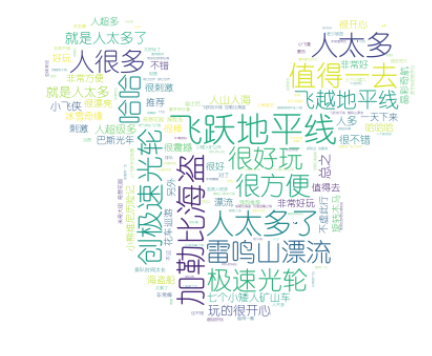

In [35]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
text = ''.join([item for sublist in list(file['comment_seg'].drop_duplicates().str.split()) for item in sublist])
alice_mask = np.array(Image.open("Mickey_Mouse_head_and_ears.png"))
wc = WordCloud( background_color="white",max_words=200, mask=alice_mask,font_path="C:/Windows/Fonts/SIMYOU.TTF",max_font_size=40,scale=0.8) #mask参数指定词云形状
wc.generate(text)
wc.to_file("wordcloud.png")

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### 情感极性分布一览

In [5]:
file['tag'].value_counts()/file['tag'].shape[0]

 0    0.534456
 1    0.360726
-1    0.104818
Name: tag, dtype: float64

### 情感极性评论数量随时间变化

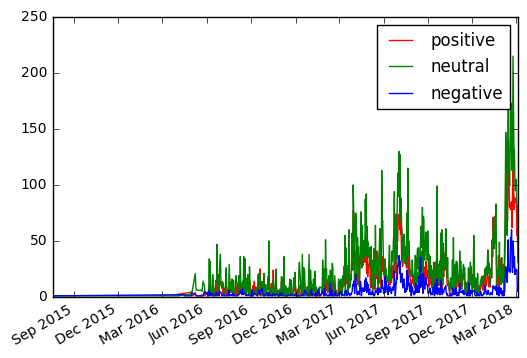

In [10]:
fig, ax = plt.subplots()
ax.plot(file[file['tag']==1]['date'].sort_values().unique(), file[file['tag']==1].groupby(['date'])['tag'].count(),color='r',label='positive')
ax.plot(file[file['tag']==0]['date'].sort_values().unique(), file[file['tag']==0].groupby(['date'])['tag'].count(),color='g',label='neutral')
ax.plot(file[file['tag']==-1]['date'].sort_values().unique(), file[file['tag']==-1].groupby(['date'])['tag'].count(),color='b',label='negative')
ax.format_xdata = mdates.DateFormatter('%Y-%m')
fig.autofmt_xdate()
plt.legend()
plt.show()

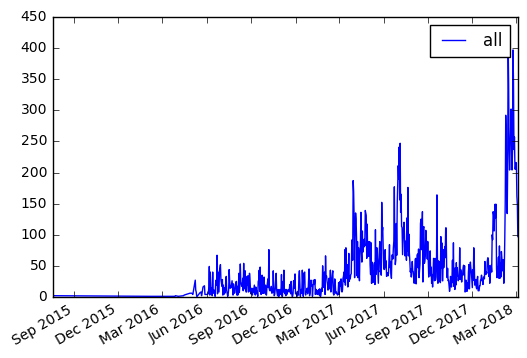

In [13]:
fig, ax = plt.subplots()
ax.plot(file['date'].sort_values().unique(), file.groupby(['date'])['tag'].count(),color='b',label='all')
ax.format_xdata = mdates.DateFormatter('%Y-%m')
fig.autofmt_xdate()
plt.legend()
plt.show()

### 情感极性评论数量随时间变化，相关性  ———> 评论数量全都是正相关的

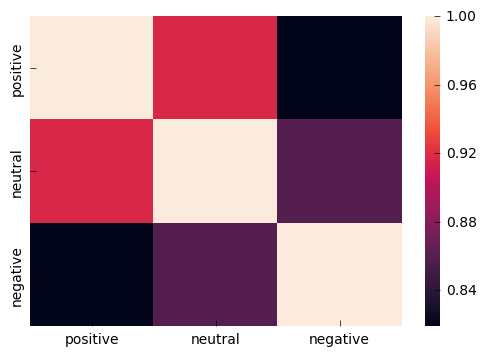

In [16]:
corr=pd.DataFrame()
corr['index']=file['date'].sort_values().unique()
positive=pd.DataFrame(file[file['tag']==1].groupby(['date'])['tag'].count())
neutral=pd.DataFrame(file[file['tag']==0].groupby(['date'])['tag'].count())
negative=pd.DataFrame(file[file['tag']==-1].groupby(['date'])['tag'].count())
corr=corr.merge(positive,how='left', left_on='index', right_index='date')
corr=corr.merge(neutral,how='left', left_on='index', right_index='date')
corr=corr.merge(negative,how='left', left_on='index', right_index='date')
corr.set_index('index',inplace=True)
corr.fillna(0,inplace=True)
corr.columns=['positive','neutral','negative']
import seaborn as sns
sns.heatmap(corr.corr(), 
            xticklabels=corr.corr().columns.values,
            yticklabels=corr.corr().columns.values)

### 正负中性情绪占比比例

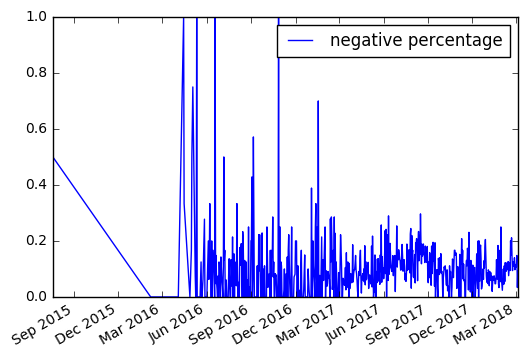

In [21]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
fig, ax = plt.subplots()
#plt.plot(corr.index,corr['positive']/corr.sum(axis=1),color='r',label='positive')
#plt.scatter(corr.index,corr['neutral']/corr.sum(axis=1),color='g',label='neutral')
ax.plot(corr.index,corr['negative']/corr.sum(axis=1),color='b',label='negative percentage')
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()
plt.legend()
plt.show()

- 问题在于，携程网站上的评论并不是每天的全量都展示出来的，有的天数只展示几条，都是负面评论，这个时候不一定可靠。因此，我选择，将那些负面评论占比超过平均数的评论筛出来，并且要求这一天的评论数超过每天评论数的平均值。一共得到了98天

In [24]:
theNegatives=corr['negative']/corr.sum(axis=1)
theWhole=corr.loc[theNegatives[theNegatives>=theNegatives.mean()].index]

In [70]:
the98=theWhole[theWhole.sum(axis=1)>corr.sum(axis=1).mean()]

In [71]:
the98=the98[the98.index>'2017-05-01']
the98=the98[the98.index<'2017-10-01']

In [78]:
filenew=file.set_index('date')
filenew=filenew.loc[the98.index]

In [79]:
filenew=filenew[filenew['tag']==-1]

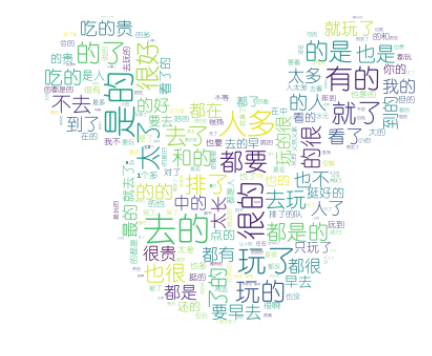

In [92]:
text = ''.join([item for sublist in list(filenew['comment_seg'].drop_duplicates().str.split()) for item in sublist if len(item)==1 ])
alice_mask = np.array(Image.open("Mickey_Mouse_head_and_ears.png"))
wc = WordCloud( background_color="white",max_words=200, mask=alice_mask,font_path="C:/Windows/Fonts/SIMYOU.TTF",max_font_size=40,scale=0.8) #mask参数指定词云形状
wc.generate(text)
wc.to_file("wordcloud.png")
# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

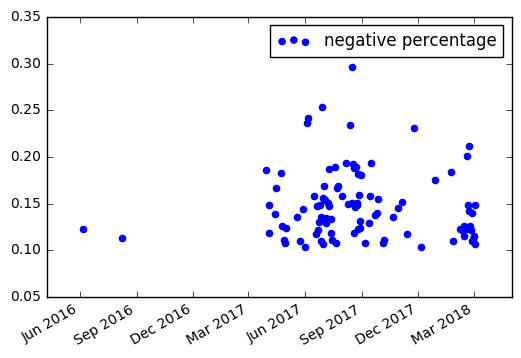

In [31]:
fig, ax = plt.subplots()
#plt.plot(corr.index,corr['positive']/corr.sum(axis=1),color='r',label='positive')
#plt.scatter(corr.index,corr['neutral']/corr.sum(axis=1),color='g',label='neutral')
ax.scatter(the98.index,the98['negative']/the98.sum(axis=1),color='b',label='negative percentage')
#ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()
plt.legend()
plt.show()

- 研究一下试运营期间的情感怎么样

In [81]:
corr_somedates=corr[corr.index > '2016-05-07'][corr[corr.index > '2016-05-07'].index < '2016-06-12']

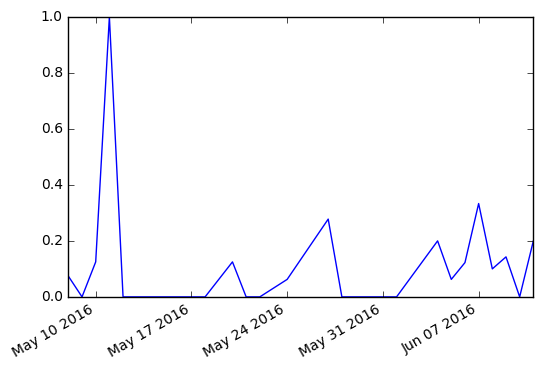

In [82]:
fig, ax = plt.subplots()
#plt.scatter(corr.index,corr['positive']/corr.sum(axis=1),color='r',label='positive')
#plt.scatter(corr.index,corr['neutral']/corr.sum(axis=1),color='g',label='neutral')
ax.plot(corr_somedates.index,corr_somedates['negative']/corr_somedates.sum(axis=1),color='b',label='negative')
ax.format_xdata = mdates.DateFormatter('%Y-%m')
fig.autofmt_xdate()
plt.show()

- 看不出来啥，还是阅读一下这段时间的用户评论吧

主要是

- 东西难吃
- 东西贵 +3
- 室外下雨排队 +2 
- 里面比较朴素
- 下雨天项目取消
- 工作人员态度
- 质量差 +3 
- 设备总是坏
- 排队太久 +3
- 人太多影响体验 +2

排除平时也会有的原因...
做差评总的关键词提取，词的计数
过年期间的关键词提取

### 由于携程展示评论的逻辑所限，不能用全量数据，但是最近一个月的貌似比较全？

In [99]:
corr_Lastmonth=corr[corr.index > '2018-02-05']
corr_Lastmonth.sum().sum()/corr.sum().sum()

0.2072451289900826

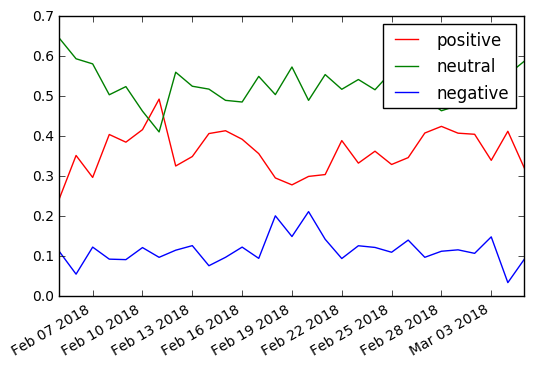

In [52]:
corr_Lastmonth=corr[corr.index > '2018-02-04']
fig, ax = plt.subplots()
#plt.scatter(corr.index,corr['positive']/corr.sum(axis=1),color='r',label='positive')
#plt.scatter(corr.index,corr['neutral']/corr.sum(axis=1),color='g',label='neutral')
ax.plot(corr_Lastmonth.index,corr_Lastmonth['positive']/corr_Lastmonth.sum(axis=1),color='r',label='positive')
ax.plot(corr_Lastmonth.index,corr_Lastmonth['neutral']/corr_Lastmonth.sum(axis=1),color='g',label='neutral')
ax.plot(corr_Lastmonth.index,corr_Lastmonth['negative']/corr_Lastmonth.sum(axis=1),color='b',label='negative')
ax.format_xdata = mdates.DateFormatter('%Y-%m')
fig.autofmt_xdate()
plt.legend()
plt.show()

In [53]:
corr_Lastmonth.index

DatetimeIndex(['2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08',
               '2018-02-09', '2018-02-10', '2018-02-11', '2018-02-12',
               '2018-02-13', '2018-02-14', '2018-02-15', '2018-02-16',
               '2018-02-17', '2018-02-18', '2018-02-19', '2018-02-20',
               '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-24',
               '2018-02-25', '2018-02-26', '2018-02-27', '2018-02-28',
               '2018-03-01', '2018-03-02', '2018-03-03', '2018-03-04',
               '2018-03-05'],
              dtype='datetime64[ns]', name='index', freq=None)

In [84]:
import seaborn as sns
np.corrcoef(corr_Lastmonth['negative']/corr_Lastmonth.sum(axis=1),corr_Lastmonth['positive']/corr_Lastmonth.sum(axis=1))

array([[ 1.        , -0.50680628],
       [-0.50680628,  1.        ]])

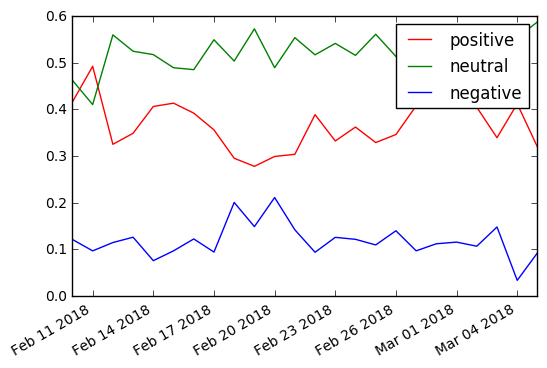

In [90]:
corr_Lastmonth=corr[corr.index > '2018-02-09']
fig, ax = plt.subplots()
#plt.scatter(corr.index,corr['positive']/corr.sum(axis=1),color='r',label='positive')
#plt.scatter(corr.index,corr['neutral']/corr.sum(axis=1),color='g',label='neutral')
ax.plot(corr_Lastmonth.index,corr_Lastmonth['positive']/corr_Lastmonth.sum(axis=1),color='r',label='positive')
ax.plot(corr_Lastmonth.index,corr_Lastmonth['neutral']/corr_Lastmonth.sum(axis=1),color='g',label='neutral')
ax.plot(corr_Lastmonth.index,corr_Lastmonth['negative']/corr_Lastmonth.sum(axis=1),color='b',label='negative')
ax.format_xdata = mdates.DateFormatter('%Y-%m')
fig.autofmt_xdate()
plt.legend()
plt.show()

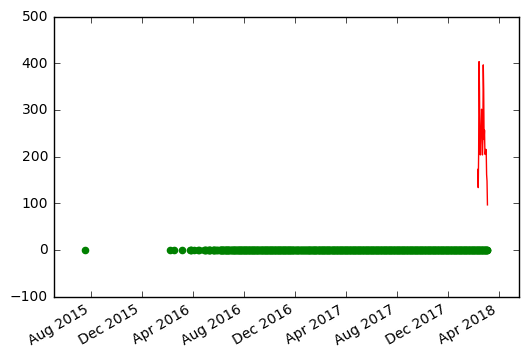

In [94]:
corr_Lastmonth=corr[corr.index > '2018-02-09']
fig, ax = plt.subplots()
#plt.scatter(corr.index,corr['positive']/corr.sum(axis=1),color='r',label='positive')
plt.scatter(corr.index,corr['neutral']/corr.sum(axis=1),color='g',label='neutral')
ax.plot(corr_Lastmonth.index,corr_Lastmonth.sum(axis=1),color='r',label='positive')
ax.format_xdata = mdates.DateFormatter('%Y-%m')
fig.autofmt_xdate()
#plt.legend()
plt.show()

周期性？是携程选取原因？考虑到评论的滞后性，应该是春节期间游玩体验不好

我觉得时间序列还是不够科学，时间这个维度不科学，只能说仅作参考了.... 还是要弄我自己的实体词典，然后看每一种的差评率，这样对比才是有意义的

### 词云

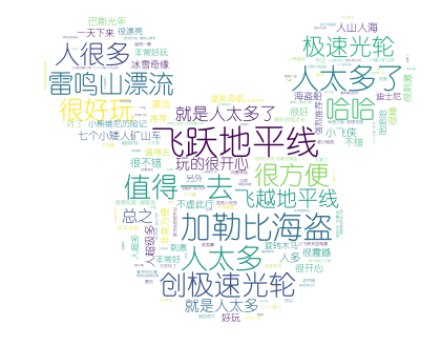

In [252]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
text = ''.join([item for sublist in list(file['comment_seg'].drop_duplicates().str.split()) for item in sublist])
alice_mask = np.array(Image.open("Mickey_Mouse_head_and_ears.png"))
wc = WordCloud( background_color="white",max_words=200, mask=alice_mask,font_path="C:/Windows/Fonts/SIMYOU.TTF",max_font_size=40,scale=0.8) #mask参数指定词云形状
wc.generate(text)
wc.to_file("wordcloud.png")

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 来看看别的维度有没有什么好分析的！


- 把每个用户的情感值加起来
- 总体符合正态分布，总体态度较为积极

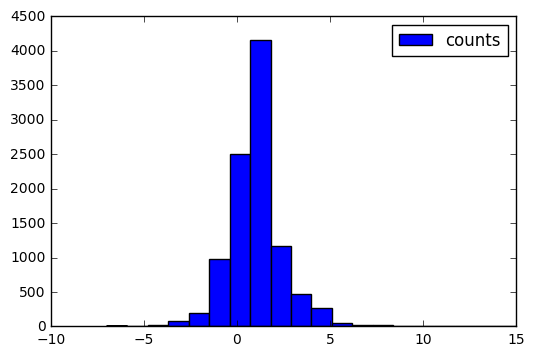

In [17]:
plt.hist(file.groupby(['userid'])['tag'].sum(),bins=20,label='counts')
plt.legend()
plt.autoscale()

In [25]:
from scipy.stats import normaltest
normaltest(file.groupby(['userid'])['tag'].sum(), axis=None)

NormaltestResult(statistic=2798.2328976245981, pvalue=0.0)

- 发现“有帮助”和情感倾向完全没有相关性 （无论是全量数据还是选取了前5页100个大家看得比较多的评论）

In [40]:
file['no']=file['userid'].str[8:]
file['no']=file['no'].astype('int')
newfile=file[file['no']<100]
plt.scatter(newfile.groupby(['userid'])['useful'].max(),newfile.groupby(['userid'])['tag'].sum())
np.corrcoef(newfile.groupby(['userid'])['useful'].max(),newfile.groupby(['userid'])['tag'].sum())

# FINE-GRAINED

### how to replace 
- 排队：排队；排
- 夜光幻影秀：夜光幻影秀；烟花；烟火；灯光秀；烟花秀；烟火秀；焰火；光影；灯光焰火秀
- 创极速光轮：创极速光轮；极速光轮；极速；创；光轮
- 快速通道：快速通道；fp；快速；快；快通；fast；pass；fp卡
- 飞越地平线：飞越地平线；飞跃地平线；地平线
- 雷鸣山漂流：雷鸣山漂流；漂流
- 花车巡游：花车巡游；花车游行；巡游；花车；花车巡演
- 加勒比海盗：加勒比海盗；加勒比；海盗；海盗船；沉落宝藏之战
- 七个小矮人矿山车：七个小矮人矿山车；过山车；七个小矮人；小矮人矿山车；小矮人矿车；小矮人

- 项目、表演、服务、食物、产品这五类分别得到的积极情感和消极情感数目

- 得到积极情感最多的前五个项目、表演、服务、食物、产品
- 得到消极情感最多的前五个项目、表演、服务、食物、产品
- 每个项目、表演、服务、食物、产品的消极和积极情感是什么

#主要有哪些积极/消极情感

#被提及最多的前五个项目、表演、服务、食物、产品（这个其实不算情感分析，不能在pairs里做，pairs必须有情感词配对，所以剔除了一些）

In [64]:
a=pairs[pairs['entity_tag']=='B-S'][pairs[pairs['entity_tag']=='B-S']['sentiment_tag']=='B-N']


,entity,entity_tag,sentiment,sentiment_tag
413,花车巡游,B-PE,很恶,B-N
590,夜光幻影秀,B-PE,累爆,B-N
610,夜光幻影秀,B-PE,挤不死你,B-N
675,夜光幻影秀,B-PE,人超多,B-N
894,夜光幻影秀,B-PE,没有,B-N
944,夜光幻影秀,B-PE,没,B-N
961,花车巡游,B-PE,没有去,B-N
962,夜光幻影秀,B-PE,太无聊没看,B-N
979,演出,B-PE,不,B-N
1003,夜光幻影秀,B-PE,不多,B-N


In [60]:
b.groupby(["sentiment", "entity"]).size().reset_index(name="frequency").sort_values('frequency', ascending=False)


,sentiment,entity,frequency
6,人太多,加勒比海盗,3
21,没有,加勒比海盗,3
14,太累了,加勒比海盗,2
15,奔赴宝藏,加勒比海盗,1
27,量又少,加勒比海盗,1
26,耗在,加勒比海盗,1
25,粗心,加勒比海盗,1
24,物价高,加勒比海盗,1
23,没有的,加勒比海盗,1
22,没有时间去,加勒比海盗,1


In [ ]:
a.groupby(["entity"]).size().reset_index(name="frequency").sort_values('frequency', ascending=False)


In [4]:
pairs=pd.read_excel('./pairs.xlsx')

In [5]:
pairs['entity']=pairs['entity'].replace('排','排队')
pairs['entity']=pairs['entity'].str.replace(r'(^烟花$|^焰火$|^烟火$|^灯光秀$|^烟花秀$|^烟火秀$|^焰火$|^光影$|^灯光焰火秀$)','夜光幻影秀')
pairs['entity']=pairs['entity'].str.replace(r'(^极速光轮$|^极速$|^创$|^光轮$)','创极速光轮')
pairs['entity']=pairs['entity'].str.replace(r'(^fp$|^快速$|^快$|^快通$|^fast$|^pass$|^fp卡$)','快速通道')
pairs['entity']=pairs['entity'].str.replace(r'(^飞跃地平线$|^地平线$)','飞越地平线')
pairs['entity']=pairs['entity'].str.replace('漂流','雷鸣山漂流')
pairs['entity']=pairs['entity'].str.replace(r'(^花车游行$|^巡游$|^花车$|^花车巡演$)','花车巡游')
pairs['entity']=pairs['entity'].str.replace(r'(^加勒比$|^海盗$|^海盗船|^沉落宝藏之战$)','加勒比海盗')
pairs['entity']=pairs['entity'].str.replace(r'(^过山车$|^七个小矮人$|^小矮人矿山车$|^小矮人矿车$|^小矮人$)','七个小矮人矿山车')

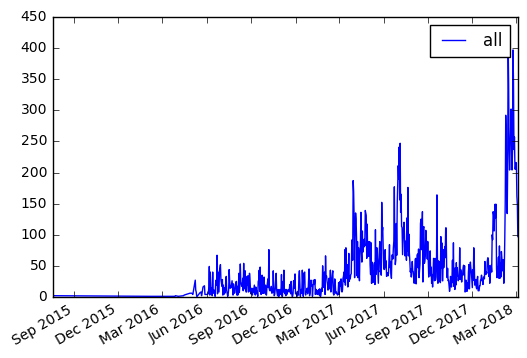

In [6]:
fig, ax = plt.subplots()
ax.plot(file['date'].sort_values().unique(), file.groupby(['date'])['tag'].count(),color='b',label='all')
ax.format_xdata = mdates.DateFormatter('%Y-%m')
fig.autofmt_xdate()
plt.legend()
plt.show()

In [7]:
a=pairs.groupby(["entity_tag", "sentiment_tag"]).size().reset_index(name="frequency")

In [8]:
pairs.groupby(["entity_tag", "entity"]).size().reset_index(name="frequency").sort_values('frequency', ascending=False)


,entity_tag,entity,frequency
857,B-S,排队,2481
462,B-PE,夜光幻影秀,1554
36,B-FA,加勒比海盗,500
813,B-S,快速通道,487
30,B-FA,创极速光轮,441
275,B-FO,吃,387
212,B-FA,飞越地平线,362
792,B-S,工作人员,303
1080,B-S,门票,272
508,B-PE,花车巡游,260


In [9]:
pairs.groupby(["sentiment_tag", "entity_tag","entity"]).size().reset_index(name="frequency").sort_values('frequency', ascending=False)


,sentiment_tag,entity_tag,entity,frequency
392,B-N,B-S,排队,1357
873,B-P,B-PE,夜光幻影秀,1327
1159,B-P,B-S,排队,1124
541,B-P,B-FA,加勒比海盗,466
536,B-P,B-FA,创极速光轮,392
1128,B-P,B-S,快速通道,331
696,B-P,B-FA,飞越地平线,309
100,B-N,B-FO,吃,274
211,B-N,B-PE,夜光幻影秀,227
914,B-P,B-PE,花车巡游,220


In [10]:
pairs[pairs['sentiment_tag']=='B-P']['sentiment'].value_counts()
pairs[pairs['sentiment_tag']=='B-N']['sentiment'].value_counts()

贵          201
没有         188
不          135
人太多        105
没          103
一般          53
太长          50
遗憾          44
久           38
长           38
少           37
人太多了        37
不够          35
太长了         30
不是          29
不好          29
太久          28
时间          24
很长          24
小贵          23
太累          23
不想          22
太           22
太贵          22
难吃          21
人           20
不如          20
失望          20
太多          20
受不了         19
          ... 
不够精致         1
没有低于105      1
没办法          1
裝修           1
别提           1
贵的吓人         1
香港的          1
强盗行径         1
不想来          1
短且好玩         1
永远           1
不枯燥          1
不是很划算啊       1
不舒服          1
冲突           1
没有无障碍通道      1
不合理          1
三遍           1
情景           1
不打           1
不适合          1
水果刀          1
愣            1
粗心           1
再贵           1
一般⋯⋯         1
长还要再去        1
卫生估计         1
物价           1
有序           1
Name: sentiment, dtype: int64

In [11]:
pairs.groupby(["sentiment_tag","sentiment","entity"]).size().reset_index(name="frequency").sort_values('frequency', ascending=False)


,sentiment_tag,sentiment,entity,frequency
4052,B-P,刺激,创极速光轮,78
736,B-N,人太多,排队,62
2534,B-N,贵,吃,58
2062,B-N,没有,排队,58
8356,B-P,震撼,夜光幻影秀,48
7548,B-P,美,夜光幻影秀,46
141,B-N,不,排队,46
3300,B-P,不错,夜光幻影秀,44
1323,B-N,太长,排队,44
3652,B-P,值得,排队,39
